In [1]:
from QAOAproblems import QAOAmaxcut
import numpy as np
from pymoo.core.problem import Problem
import networkx as nx
import matplotlib as plt

### Teste Calculate Minimal Paths e Next Qubits

Gerando o grafo do exemplo do artigo

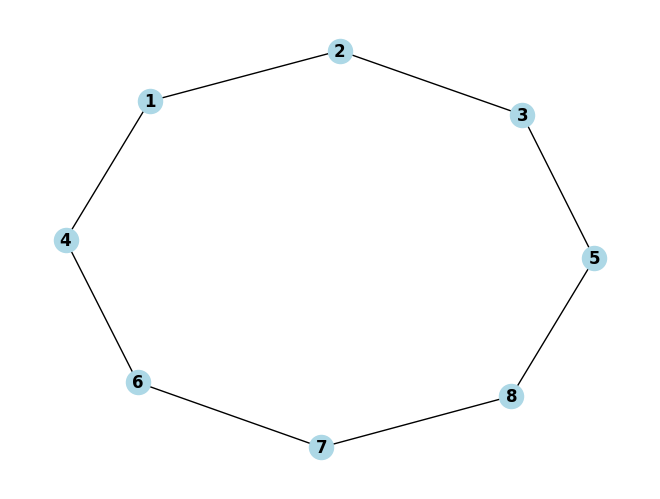

In [2]:
qubitmap_t = [0,1,2,3,4,5,6,7,8]
QM = nx.Graph()
QM.add_edges_from([(1,2),(2,3), (1,4), (3,5), (4,6), (6,7), (7,8), (5,8)])
nx.draw(QM, with_labels=True, node_color='lightblue', font_weight='bold')

Testando o exemplo do artigo

In [3]:
max_cut = QAOAmaxcut(num_gates=4, qubitmap=qubitmap_t, hardware_graph=QM,current_time=[0,0,0,0,0] )
path1, path2 = max_cut._calculate_minimal_paths(5, 8, 3, 2)
print(path1)
print(path2)

[5, 3]
[8, 5, 3, 2]


Ele gera os caminhos conforme o artigo, temos que checar agora se faz o swap

In [4]:
max_cut = QAOAmaxcut(num_gates=4, qubitmap=qubitmap_t, hardware_graph=QM,current_time=[0,0,0,0,0] )
path1s, path2s = max_cut._calculate_minimal_paths(3, 5, 3, 2)
print(path1s)
print(path2s)

[3]
[5, 3, 2]


In [5]:
max_cut._swap_paths(path1s, path2s, 3)

([3, 2], [5, 3])

Troca os caminhos corretamente

Testando next_qubits

In [6]:
max_cut._next_qubits(path1, path2, 5,8)

(5, 3)

In [7]:
max_cut._next_qubits(path2, path1, 8,5)

(5, 3)

Funcionando dentro do esperado, como q_nj = 5, ele deve sempre escolher o outro caminho independente do path1 ou path 2

In [8]:
patht1, patht2 = max_cut._calculate_minimal_paths(5, 6, 5, 6)
print(patht1)
print(patht2)

[5]
[6]


Funcionando!

### Teste Decoding

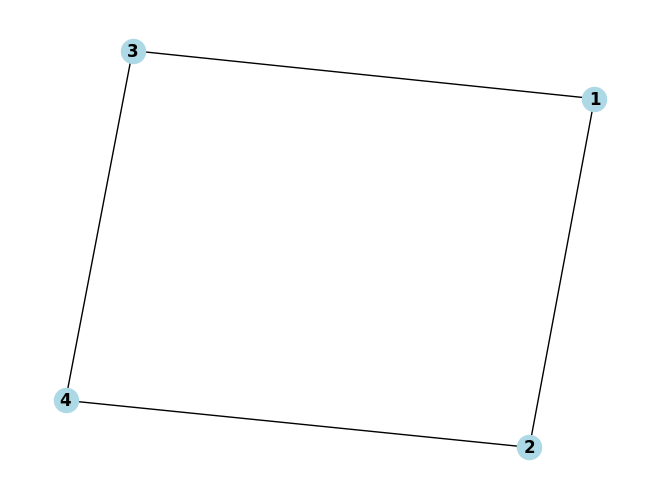

In [19]:
QM = nx.Graph()
QM.add_edges_from([(1,2),(1,3), (2,4), (3,4)])
nx.draw(QM, with_labels=True, node_color='lightblue', font_weight='bold')

In [20]:
qubitmap_t = [0,1,2,3,4]
max_cut = QAOAmaxcut(num_gates=4, qubitmap=qubitmap_t, hardware_graph=QM,current_time=[0,0,0,0,0] )
ch1 = [(4,3), (1,3), (1,2), (2,3)]
ch2 = [(3,4), (1,3), (1,2), (3,4)]
max_cut.decoding(ch1=ch1, ch2=ch2)

In [21]:
max_cut.node_time

[1, 10, 15, 15, 12]

Considerando o artigos, os tempos são 10, 16, 16, 12. Como todos os p-s pesam 3, fica 15